This code plots Figure2 panels A and B ii,iii and Supplementary Figure1

In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import numpy as np

In [2]:
adata = sc.read('adata_umap_pca.h5')

In [3]:
celltype_colour = ["#532C8A",
"#c19f70",
"#f9decf",
"#c9a997",
"#B51D8D",
"#3F84AA",
"#9e6762",
"#354E23",
"#F397C0",
"#eda450",                             
"#635547",
"#C72228",
"#f77b59",
"#EF4E22",  
"#8870ad",
"#647a4f",
"#EF5A9D",   
"#FBBE92",           
"#139992",  
"#ed8f84",
"#DFCDE4",
"#8EC792",                                    
"#C594BF",                 
"#C3C388",
"#0F4A9C",                          
"#FACB12",                                       
"#8DB5CE",
"#C9EBFB",  
"#DABE99",
"#65A83E",
"#005579",                                  
"#CDE088",
"#BBDCA8",
"#F6BFCB"]

adata.uns['celltype_colors'] = celltype_colour

In [4]:
# Spliced PCs

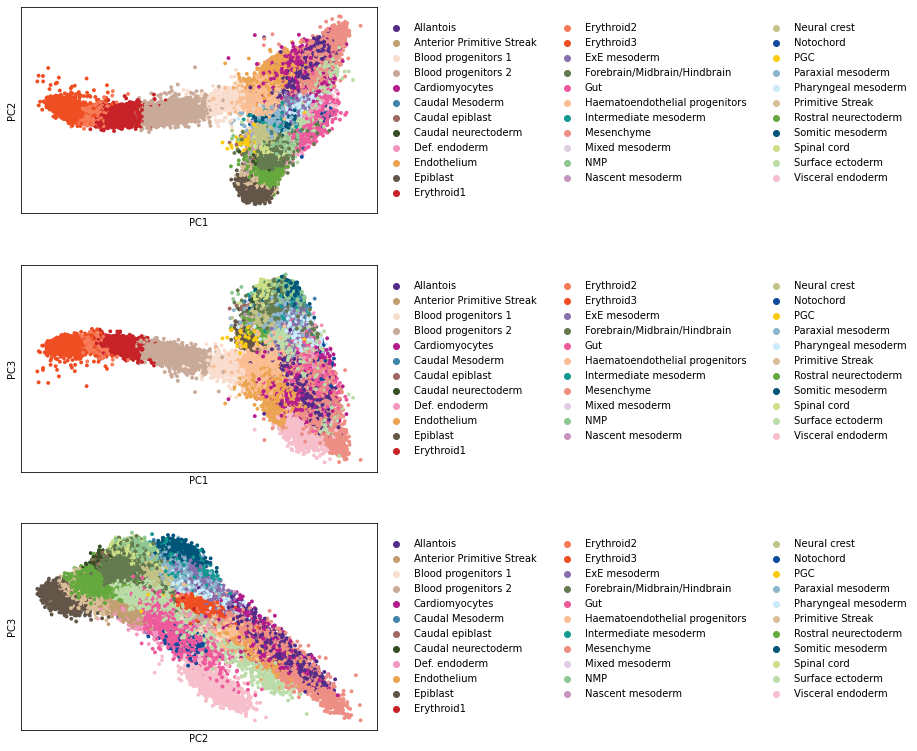

In [5]:
sc.pl.pca(adata, ncols = 1, color = 'celltype', s = 60, components=['1,2', '1,3','2,3'], title=['','',''])

In [6]:
# Unspliced PCs

In [7]:
unspliced_pca = pd.read_csv('./corrected_unspliced.csv', index_col = 0)

In [8]:
unspliced_pca = unspliced_pca.reindex(adata.obs_names)
adata.obsm['X_pca'] = unspliced_pca.values

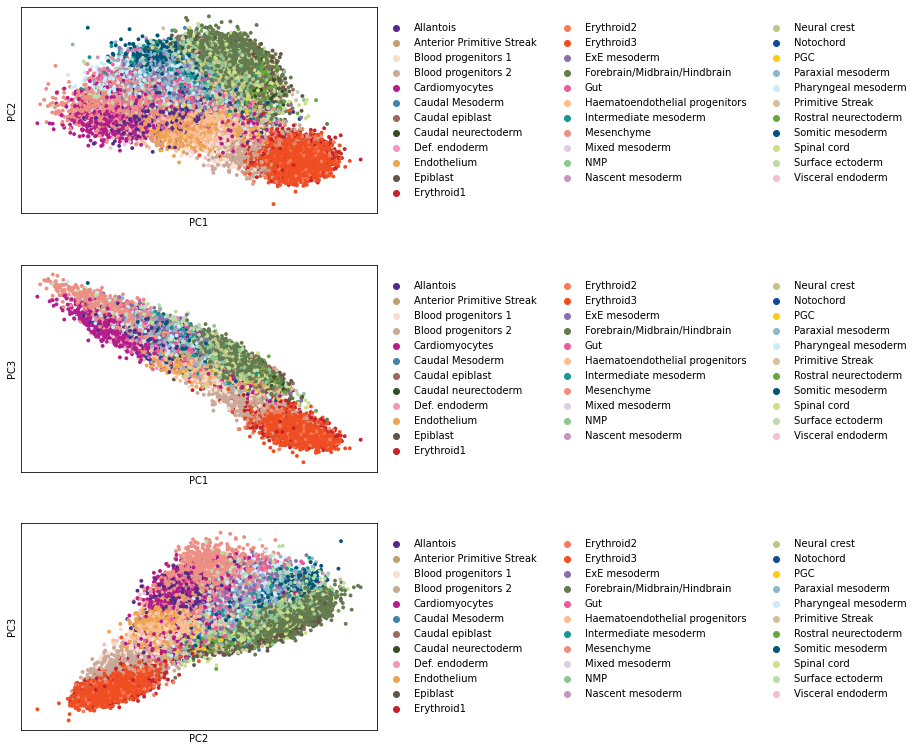

In [9]:
sc.pl.pca(adata,ncols = 1, color = ['celltype'], s = 60, components=['1,2', '1,3','2,3'], title=['','',''])

In [10]:
# MOFA PCs

In [11]:
mofa_pca = pd.read_csv('./corrected_pca_all_atlas_reducedMNN.csv',index_col=0)

In [12]:
mofa_pca = mofa_pca.reindex(adata.obs_names)
adata.obsm['X_pca'] = mofa_pca.values

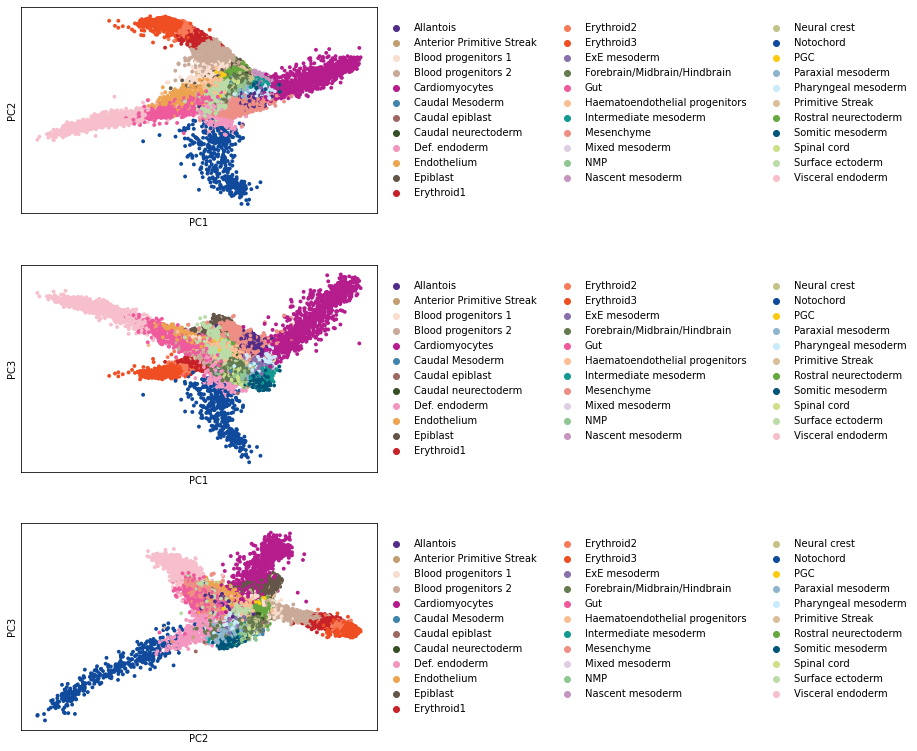

In [13]:
sc.pl.pca(adata,ncols = 1, color = 'celltype',s = 60, components=['1,2', '1,3','2,3'], title=['','',''])

In [14]:
# Plot intersection of HVGs

In [15]:
hvg_u = pd.read_csv('./hvg_u.csv')
hvg_s = pd.read_csv('./hvg_s.csv')

In [16]:
lhvg_s = list(hvg_s.x)
lhvg_u = list(hvg_u.x)

In [17]:
intersection = [lhvg_u[i] for i in range(5000) if lhvg_u[i] in lhvg_s]

In [18]:
len(intersection)

1710

In [19]:
# Figure 2B ii

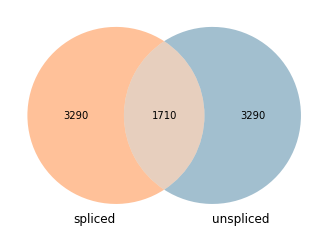

In [20]:
venn2(subsets = (3290, 3290, 1710), set_labels = ('spliced', 'unspliced'),set_colors=['#ff6500','#185f87'])
plt.show()
plt.rcParams["axes.grid"] = False

In [21]:
# Plot MOFA weights

In [22]:
weights = pd.read_csv('./weights_mofa_all.csv',index_col = 0)

In [23]:
weights_s = weights.loc[ (weights.view == 'spliced')]
weights_u = weights.loc[ (weights.view == 'unspliced')]

In [24]:
weights_s.index = list(hvg_s.x)*8 + weights_s.factor
weights_u.index = list(hvg_u.x)*8 + weights_u.factor

In [25]:
weights_s['gene'] = list(hvg_s.x)*8
weights_u['gene'] = list(hvg_u.x)*8

/home/mb2338/miniconda3/envs/scvelo2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/mb2338/miniconda3/envs/scvelo2/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
w = pd.concat([weights_s,weights_u],axis = 1,ignore_index=True)
w0 = w.fillna(0)

In [27]:
vecs = np.where(np.abs(w0[2]) >= 1)[0]
vecu = np.where(np.abs(w0[7]) >= 1)[0]

In [28]:
# Plot Figure 2B iii

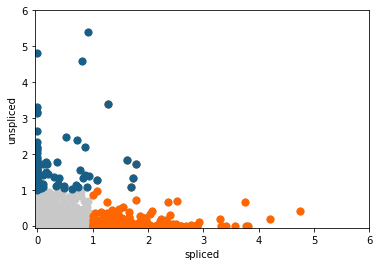

In [29]:
ps =50
plt.scatter(np.abs(w0[2]), np.abs(w0[7]),s = ps, c = '#C8C8C8')
plt.scatter(np.abs(w0[2][vecs]), np.abs(w0[7][vecs]),s = ps, c = '#ff6500')
plt.scatter(np.abs(w0[2][vecu]), np.abs(w0[7][vecu]),s = ps, c = '#185f87')
x = np.arange(0,1,0.1)
y = 2 * x 

plt.xlabel('spliced')
plt.ylabel('unspliced')

plt.xlim([-.05,6])
plt.ylim([-.06,6])
plt.rcParams["axes.grid"] = False
plt.rcParams.update({'font.size': 10})